<a href="https://colab.research.google.com/github/Amey-Thakur/PYTHON-CRASH-COURSE/blob/main/PYTHON_CRASH_COURSE_DAY_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 7**

**Working with missing values**

**Project:**

**Movie Recomender System**

A pandas based movie recommender system to recomend good or bad movies.

In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
#lets load the file into dataset as variable
movies_df = pd.read_csv('/content/IMDB-Movie-Data.csv', index_col='Title')

In [3]:
#use head to view whats in dataset
movies_df.head(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [4]:
#lets print the shape of the dataset
movies_df.shape

(1000, 11)

In [5]:
#lets get the information about our dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [6]:
#Lets handle duplicate entries
tmp_df = movies_df.append(movies_df)
tmp_df.shape

(2000, 11)

In [7]:
#lets drop the duplicates
temp_df = tmp_df.drop_duplicates()
temp_df.shape

(1000, 11)

In [8]:
tmp_new_df = temp_df.append(temp_df)

In [9]:
tmp_new_df.drop_duplicates(inplace=True)
tmp_new_df.shape

(1000, 11)

drop_duplicates(keep=[first,last,fasle])

first: (default) Drops duplicates except for the first occurence

last: Drops duplicates except for the last occurence

fasle: Drops all duplicates

In [10]:
tmp_new_df = temp_df.append(temp_df)

In [11]:
tmp_new_df.drop_duplicates(inplace = True, keep=False)
tmp_new_df.shape

(0, 11)

In [12]:
#Column Cleanup
#lets print the column names
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [13]:
#lets rename our runtime and revenue columns
movies_df.rename(columns={
    'Runtime (Minutes)':'Runtime',
    'Revenue (Millions)':'Revenue'
},inplace=True)

In [14]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [15]:
#task: rename all the column names with lower case
movies_df.columns = [col.lower() for col in movies_df]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue', 'metascore'],
      dtype='object')

**Working with missing values**

In [16]:
#lets calculate null values in each column of our dataset
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#lets count total number of null values
movies_df.isnull().sum()

rank             0
genre            0
description      0
director         0
actors           0
year             0
runtime          0
rating           0
votes            0
revenue        128
metascore       64
dtype: int64

In [18]:
#Removing null values
#Imputation: Its a cinventional feature engineering technique used to keep
#valuable data that have null values,
rev = movies_df['revenue']
rev.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue, dtype: float64

In [19]:
#lets calculate the mean
rev_mean = rev.mean()
rev_mean

82.95637614678897

In [20]:
#lets fill the nulls using fillna 
rev.fillna(rev_mean, inplace=True)

In [21]:
movies_df.isnull().sum()

rank            0
genre           0
description     0
director        0
actors          0
year            0
runtime         0
rating          0
votes           0
revenue         0
metascore      64
dtype: int64

In [22]:
meta = movies_df['metascore']
meta_mean = meta.mean()
meta_mean
meta.fillna(meta_mean, inplace=True)
movies_df.isnull().sum()

rank           0
genre          0
description    0
director       0
actors         0
year           0
runtime        0
rating         0
votes          0
revenue        0
metascore      0
dtype: int64

In [23]:
#Underaranding the variables
movies_df.describe()

,rank,year,runtime,rating,votes,revenue,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [24]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [25]:
#Lets find the relationship between continous variables
movies_df.corr()

,rank,year,runtime,rating,votes,revenue,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.185159
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
revenue,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
metascore,-0.185159,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


**Data Frame slicing, selecting and extracting**

In [26]:
#By Columns
genre_col = movies_df['genre']
type(genre_col)

pandas.core.series.Series

In [27]:
genre_col = movies_df[['genre']]
type(genre_col)

pandas.core.frame.DataFrame

In [28]:
subset = movies_df[['genre','rating']]
subset.head()

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2


In [29]:
#by rows
#.loc: locates the value by name
#.iloc: locates by numeric index

prom = movies_df.loc['Prometheus']
prom

rank                                                           2
genre                                   Adventure,Mystery,Sci-Fi
description    Following clues to the origin of mankind, a te...
director                                            Ridley Scott
actors         Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                        2012
runtime                                                      124
rating                                                         7
votes                                                     485820
revenue                                                   126.46
metascore                                                     65
Name: Prometheus, dtype: object

In [30]:
#.iloc
prom_iloc = movies_df.iloc[1]
prom_iloc

rank                                                           2
genre                                   Adventure,Mystery,Sci-Fi
description    Following clues to the origin of mankind, a te...
director                                            Ridley Scott
actors         Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                        2012
runtime                                                      124
rating                                                         7
votes                                                     485820
revenue                                                   126.46
metascore                                                     65
Name: Prometheus, dtype: object

In [31]:
#Conditional Selection
cond = (movies_df['director'] == 'Ridley Scott')
cond.head()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

In [32]:
movies_df[cond]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0
The Counselor,522,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0
A Good Year,531,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0
Body of Lies,738,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0


In [33]:
#print all the movies whose rating is greater than 8.0
movies_df[movies_df['rating'] >= 8.0].head(10)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.000000
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.000000
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.000000
Lion,19,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.000000
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.000000
Bahubali: The Beginning,27,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,58.985043
Deadpool,34,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.000000
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.000000
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.000000


In [34]:
#Using multiple conditons
movies_df[(movies_df['director'] == 'Christopher Nolan')| cond]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


In [35]:
#isin()
movies_df[movies_df['director'].isin(['Ridley Scott','Christopher Nolan'])]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


task: 
1. print all the movies that are released between the year 2005 and 2010
2. whose rating is more than 8.0
3. which made 25th percentile in revenue. (hint: use quantile(.25) to calculate the percentile.)

In [36]:
movies_df[
          (movies_df['year']>=2005) & (movies_df['year']<=2010)
          & (movies_df['rating']>8.0) 
          & (movies_df['revenue']<movies_df['revenue'].quantile(0.25))
          ]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [37]:
#Applying functions
def rating_fun(x):
  if(x >= 8.0):
    return "Good Movie"
  else:
    return "Bad Movie"

In [38]:
movies_df['user_review_column'] = movies_df['rating'].apply(rating_fun)
movies_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue,metascore,user_review_column
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good Movie
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Bad Movie
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Bad Movie
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Bad Movie
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Bad Movie


# **Data Visulaization using Matplotlib**

In [39]:
#lets import the library
import matplotlib.pyplot as plt


In [40]:
plt.rcParams.update({'font.size':20, 'figure.figsize':(10,8)})

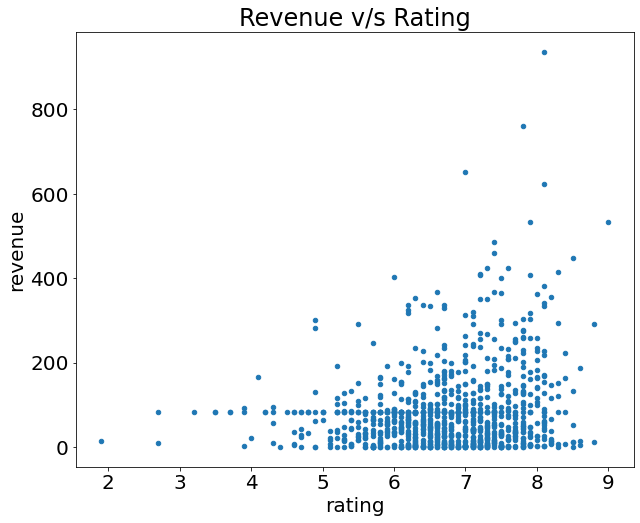

In [41]:
#lets plot the relationship between Rating and Revenue
movies_df.plot(kind='scatter', x = 'rating', y = 'revenue', title='Revenue v/s Rating');

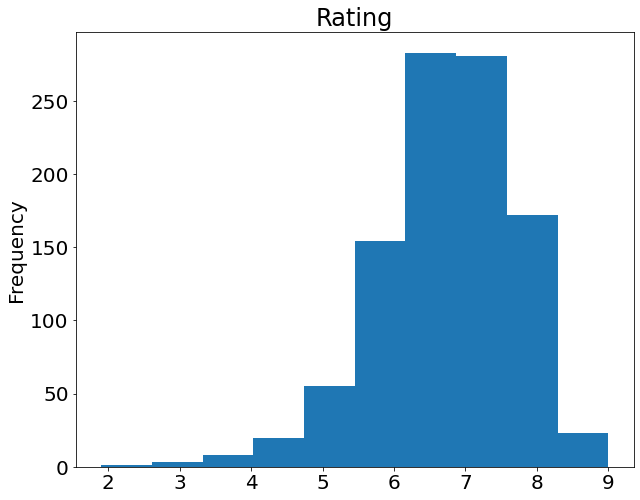

In [42]:
#lets plot a histogram on a single colum
movies_df['rating'].plot(kind='hist',title='Rating');

In [43]:
#lets get the description of our dataframe
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

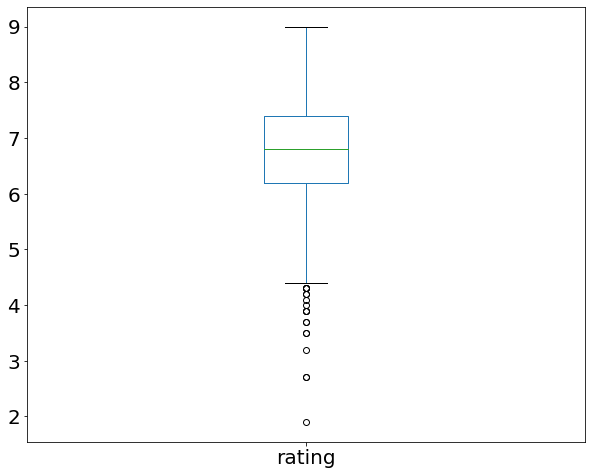

In [44]:
#lets display it using box plot
movies_df['rating'].plot(kind='box');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


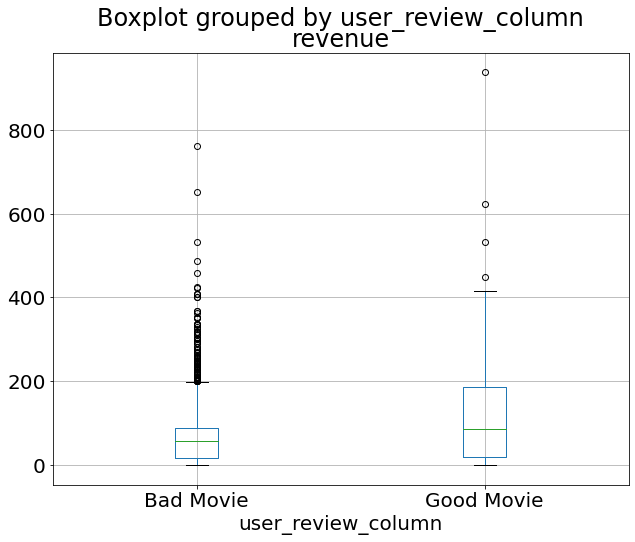

In [45]:
#combining a=categorical and continuous data
movies_df.boxplot(column='revenue',by= 'user_review_column');